In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Entrenamieto_ECI_2020.csv')
df = df.dropna()
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [3]:
df = df[(df.Stage == 'Closed Lost') | (df.Stage == 'Closed Won') ]

In [4]:
dfoc = df.drop(df.index[df['Total_Amount_Currency'] == 'GBP'])
dfoc = dfoc.drop(dfoc.index[dfoc['Total_Amount_Currency'] == 'EUR'])
dfoc = dfoc.drop(dfoc.index[dfoc['Total_Amount_Currency'] == 'JPY'])
dfoc = dfoc.drop(dfoc.index[dfoc['Total_Amount_Currency'] == 'AUD'])

In [5]:
dfoc.T

,2,3,4,5,6,7,23,24,64,77,...,16861,16864,16920,16921,16922,16930,16940,16941,16945,16946
ID,27446,16808,16805,16802,16799,27455,28524,4915,19342,4937,...,28555,27461,18513,18516,18519,28372,20827,20830,28561,28318
Region,Americas,Americas,Americas,Americas,Americas,Americas,APAC,APAC,Americas,APAC,...,APAC,Americas,Japan,Japan,Japan,Americas,Americas,Americas,Americas,Americas
Territory,NW America,NW America,NW America,NW America,NW America,NW America,India,India,NW America,India,...,Indonesia,NW America,None,None,None,SE America,NE America,NE America,NE America,NE America
"Pricing, Delivery_Terms_Quote_Appr",0,1,1,1,1,1,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1
"Pricing, Delivery_Terms_Approved",0,0,0,0,0,1,1,1,0,1,...,0,0,1,1,1,0,0,0,1,1
Bureaucratic_Code_0_Approval,0,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,0,0,1,1
Bureaucratic_Code_0_Approved,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,1,1
Submitted_for_Approval,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_5,Bureaucratic_Code_5,Bureaucratic_Code_5,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,...,Bureaucratic_Code_5,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_5,Bureaucratic_Code_5,Bureaucratic_Code_4,Bureaucratic_Code_4
Account_Created_Date,4/21/2015,7/27/2013,7/27/2013,7/27/2013,7/27/2013,4/21/2015,10/13/2015,12/9/2015,8/22/2013,12/14/2015,...,10/16/2015,4/21/2015,7/28/2013,7/28/2013,7/28/2013,9/25/2015,6/16/2014,6/16/2014,10/20/2015,9/3/2015


Text(0.5, 1.0, 'Oportunidades ganadas y perdidas segun Toneladas de refrigeración Y Monto total en USD')

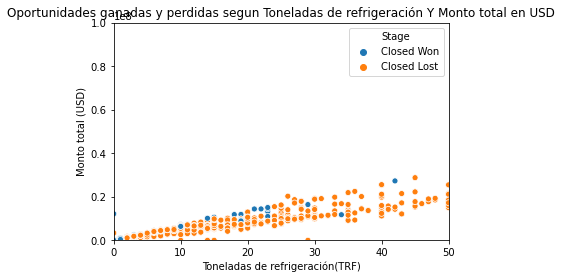

In [6]:
g = sns.scatterplot(data=dfoc, x="TRF", y="Total_Amount", hue="Stage")
g.set(xlim=(0, 100))
g.set(ylim=(0, 100000000))
g.set_xlabel('Toneladas de refrigeración(TRF)')
g.set_ylabel('Monto total (USD)')
g.set_title('Oportunidades ganadas y perdidas segun Toneladas de refrigeración Y Monto total en USD')

In [7]:
dfoc["Total_Amount_Currency"].value_counts()

USD    6812
Name: Total_Amount_Currency, dtype: int64

In [8]:
dfoc_won = dfoc[(dfoc.Stage == 'Closed ') | (dfoc.Stage == 'Closed Won') ]
dfoc_lost = dfoc[(dfoc.Stage == 'Closed Lost') | (dfoc.Stage == 'Closed') ]

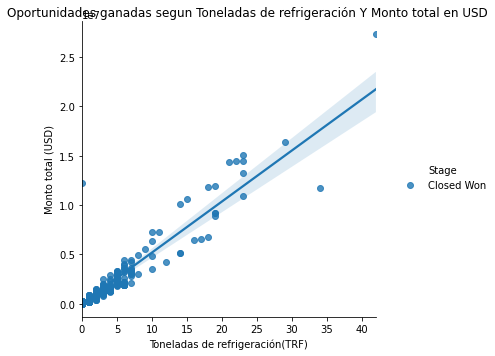

In [9]:
g = sns.lmplot(
    data=dfoc_won,
    x="TRF", y="Total_Amount", hue="Stage",
    height=5
)
fig = g.fig 
fig.suptitle('Oportunidades ganadas segun Toneladas de refrigeración Y Monto total en USD',fontsize=12)
g.set_axis_labels("Toneladas de refrigeración(TRF)", "Monto total (USD)")

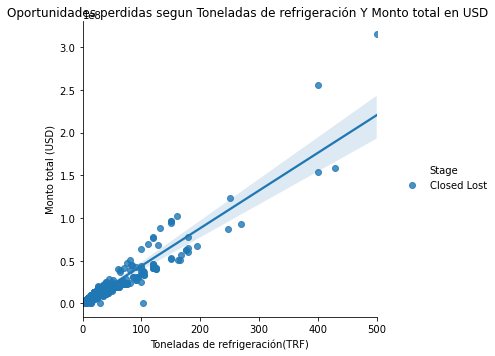

In [10]:
g = sns.lmplot(
    data=dfoc_lost,
    x="TRF", y="Total_Amount", hue="Stage",
    height=5
)
fig = g.fig 
fig.suptitle('Oportunidades perdidas segun Toneladas de refrigeración Y Monto total en USD',fontsize=12)
g.set_axis_labels("Toneladas de refrigeración(TRF)", "Monto total (USD)")

In [11]:
#df_oportunidades = df_oportunidades_cerradas.drop(['Quote_Expiry_Date','Sales_Contract_No','Opportunity_Name','Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved','Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved','Submitted_for_Approval','Bureaucratic_Code','Prod_Category_A','Total_Taxable_Amount_Currency','Total_Taxable_Amount','Actual_Delivery_Date','Delivery_Year','Delivery_Quarter','Month','Planned_Delivery_End_Date','Last_Activity','Currency','Price','Product_Category_B','Size','Product_Type','Brand','Quote_Type'],axis=1)